## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For Displaying all the columns of Data Frame
pd.pandas.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv('train.csv')
print(dataset.shape)

(1460, 81)


In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### WORKING ON MISSING VALUES

In [5]:
# So lets find the features which have missing values. For this purpose I am creating a list
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum() > 1]
# Features is the variable name above we can also directly start the statement from for features in dataset.columns......
# lets print  feature name with percent of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(),4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


### SINCE THERE ARE MISSING VALUES WE NEED TO FIND THE RELATIONSHIP BETWEEN THEM AND THE SALES PRICE

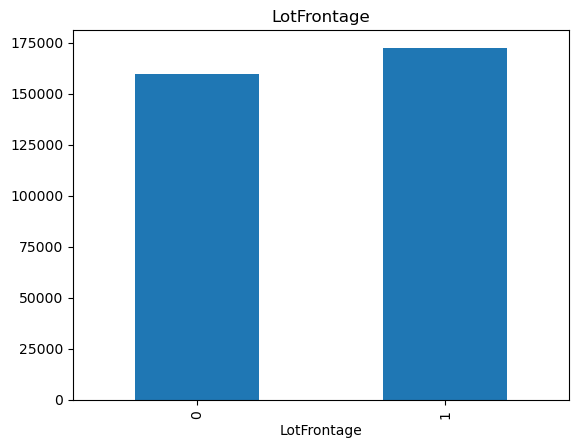

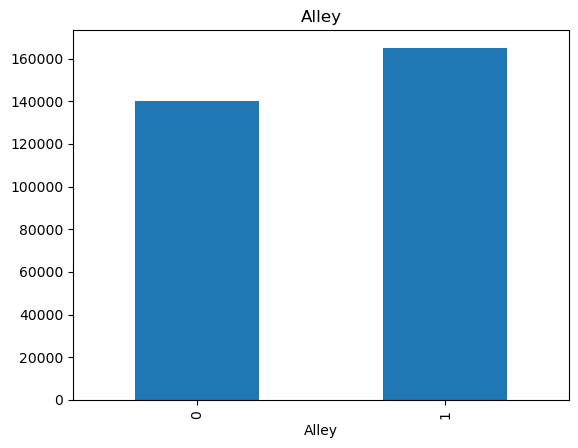

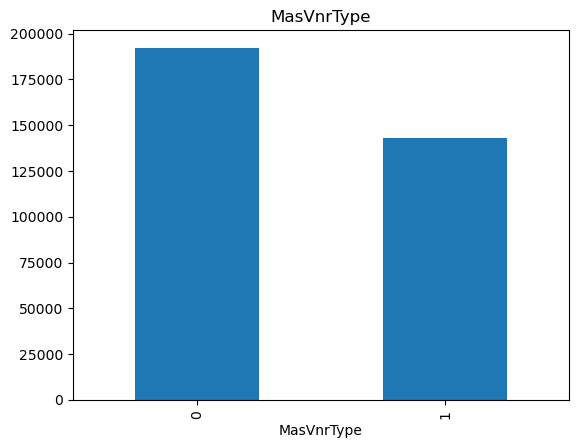

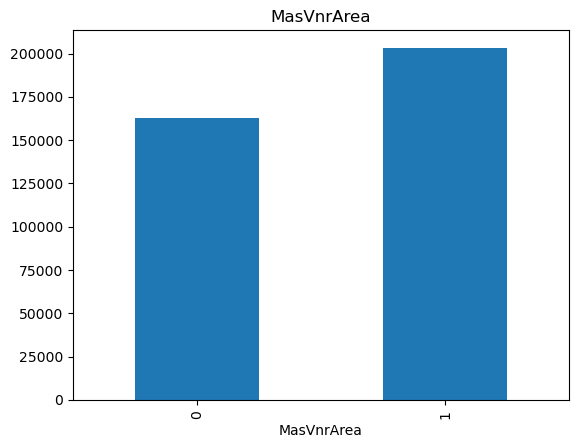

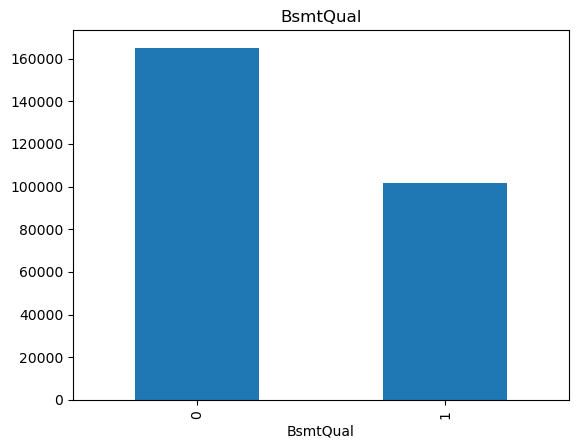

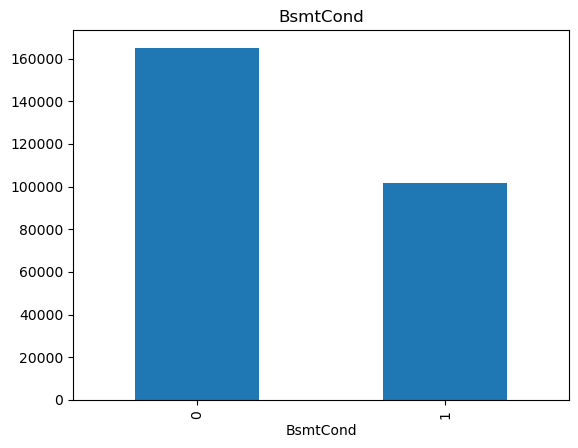

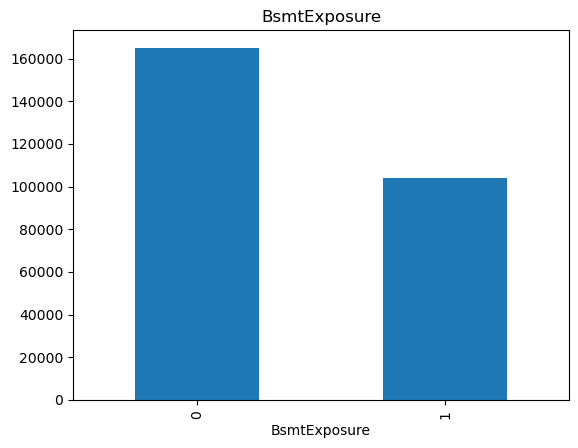

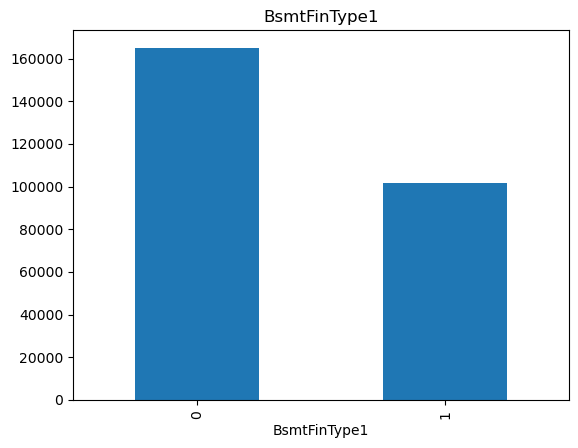

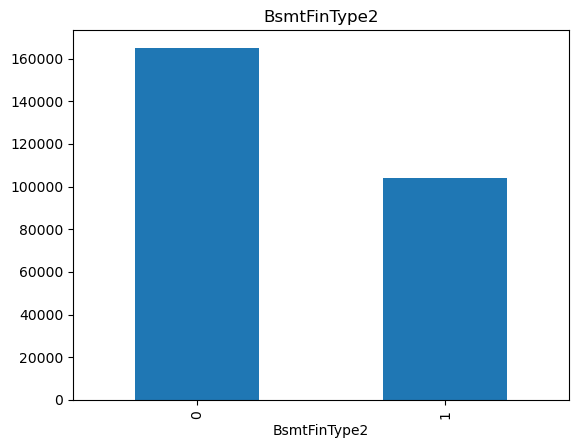

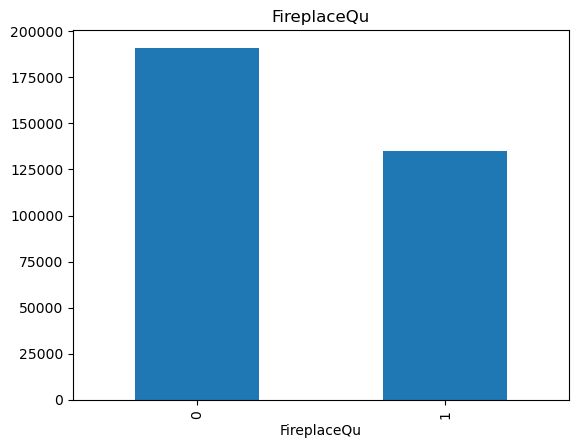

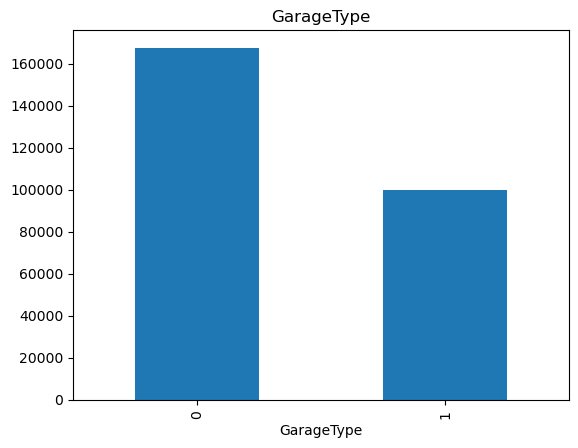

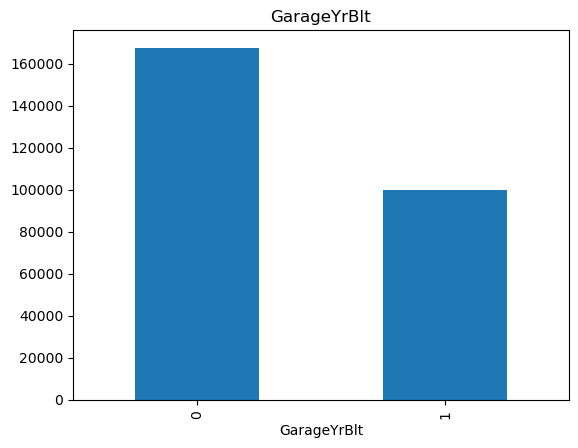

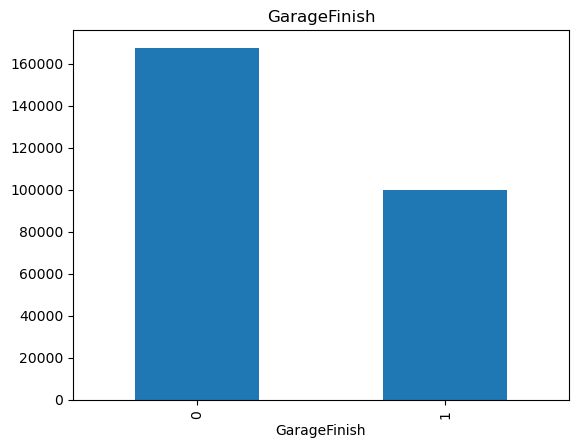

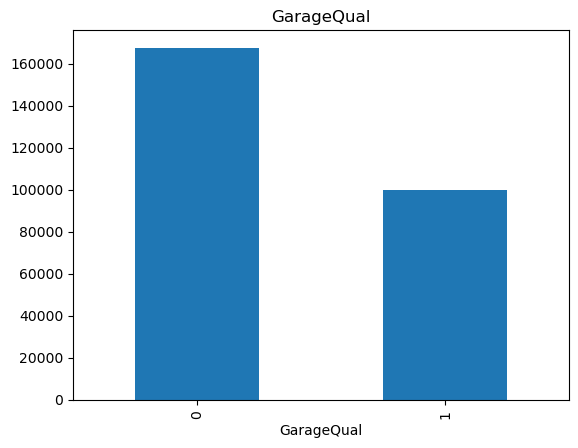

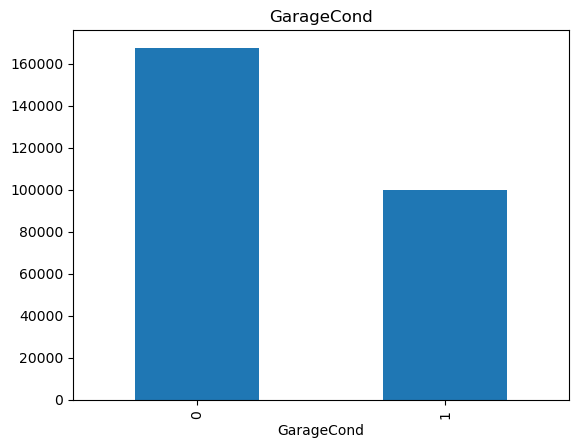

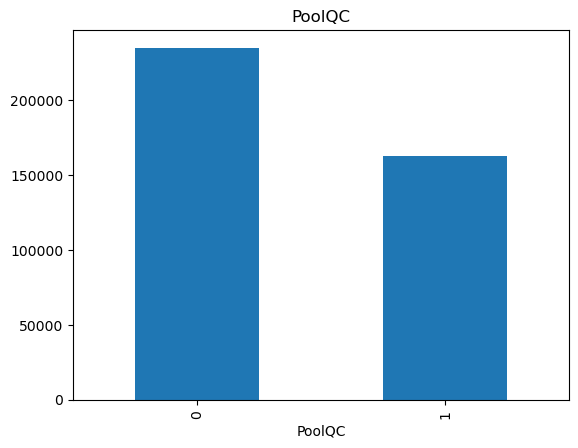

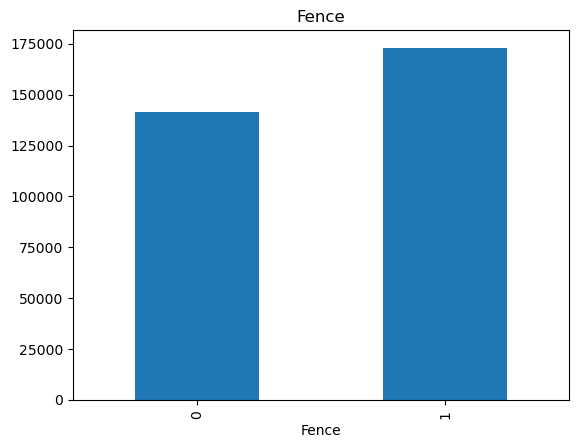

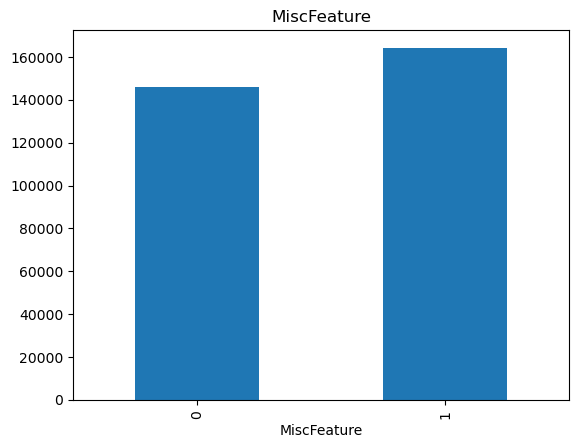

In [6]:
# LETS PLOT graph for better understanding
for feature in features_with_na:
    data = dataset.copy()
    
    # 1 observation with missing value     # 0 observation without missing value
    data[feature]= np.where(data[feature].isnull(), 1,0)
    
    # we calcluate mean sale price where info is missing 
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

From the above graph we can conclude that the 1 ( missing values) plays an important role on highering the price of the house . We can say that it affects the price of the house. So we need to do something for better prediction

Explanation:

1)data.groupby(feature)['SalePrice'].median():

The groupby(feature) part groups the data by the binary column created earlier (data[feature]) which represents missing values (1) and non-missing values (0).
['SalePrice'] specifies that we are interested in the 'SalePrice' column for our analysis.
.median() calculates the median 'SalePrice' for each group (missing values vs. non-missing values).


2).plot.bar():

After grouping and calculating the median, .plot.bar() is used to create a bar chart. In this chart:
The x-axis represents the two groups (missing values vs. non-missing values), which are encoded as 1 and 0 in the binary column.
The y-axis represents the median 'SalePrice' for each group.


3)plt.title(feature):

Sets the title of the bar chart to the name of the current feature being analyzed. This makes it easier to identify which feature's impact on 'SalePrice' is being visualized.

4)plt.show():

Displays the bar chart.

### Numerical variables

In [7]:
numerical_features = [ features for features in dataset.columns if dataset[features].dtypes != 'O']

print('Number of numerical_features is :',len(numerical_features))

dataset[numerical_features].head()

Number of numerical_features is : 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal variable(date time variable)
They are called temporal because they can be changed or added i.e data will be updated everyyear so its temporal

In [8]:
# we are checking string having yr and year mentioned
year_feature  = [ features for features in numerical_features if 'Yr' in features or 'Year' in features]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

numerical_features could be a variable that holds a list or array of the names of numerical columns in a DataFrame. 

If your intention is to access a specific column within the numerical_features list, you would use standard Python indexing or list operations. 

In [9]:
for feature in year_feature:
    print(feature,dataset[feature].values)

YearBuilt [2003 1976 2001 ... 1941 1950 1965]
YearRemodAdd [2003 1976 2002 ... 2006 1996 1965]
GarageYrBlt [2003. 1976. 2001. ... 1941. 1950. 1965.]
YrSold [2008 2007 2008 ... 2010 2010 2008]


Text(0.5, 1.0, 'House price vs year Sold')

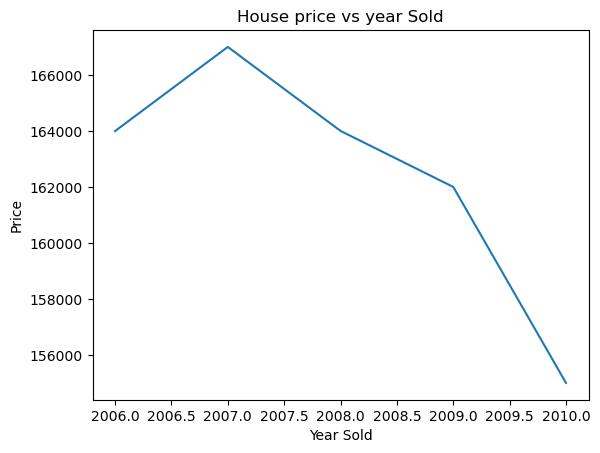

In [10]:
# Lets analyze the temporal variable
# lets check the relationship between year and sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Price')
plt.title('House price vs year Sold')

We can clearly see how the house price is linked with the year sold from above graph 

In [11]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

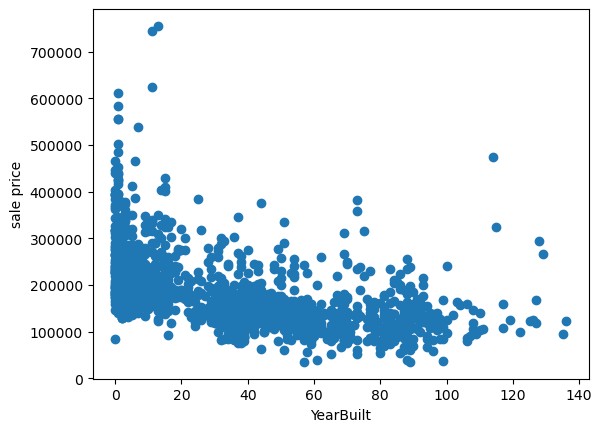

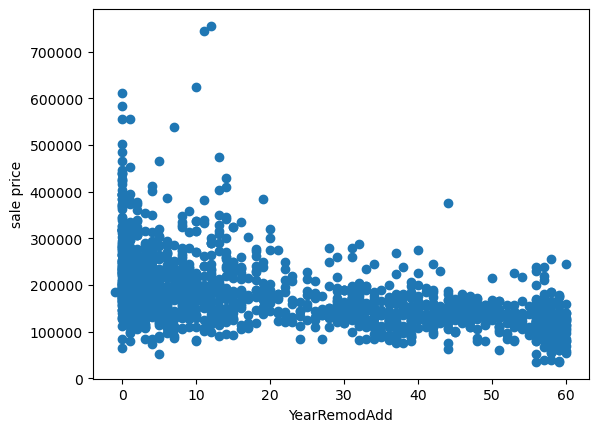

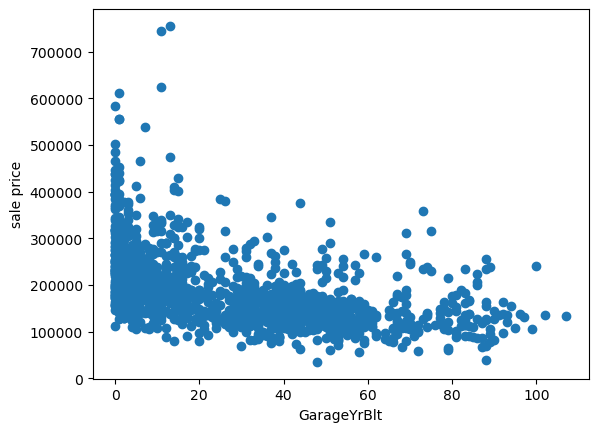

In [12]:
# Now lets compare all year features with house price excluding year year

for feature in year_feature:
    if feature!='YrSold':
        data = dataset.copy()
        # we want to create a visual for every other year feature so
        #The subtraction data['YrSold'] - data[feature] calculates the difference between the 'YrSold' values 
        #and the values in the specified feature column.
        data[feature]= data['YrSold'] - data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('sale price')
        plt.show()

In [13]:
# Now numerical data can be of two types
#1) continous and 2) discrete
discrete_feature = [features for features in numerical_features if len(dataset[features].unique())< 25 and features not in year_feature + ['Id']]
print('Number of discrete features',len(discrete_feature))

Number of discrete features 17


In [14]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

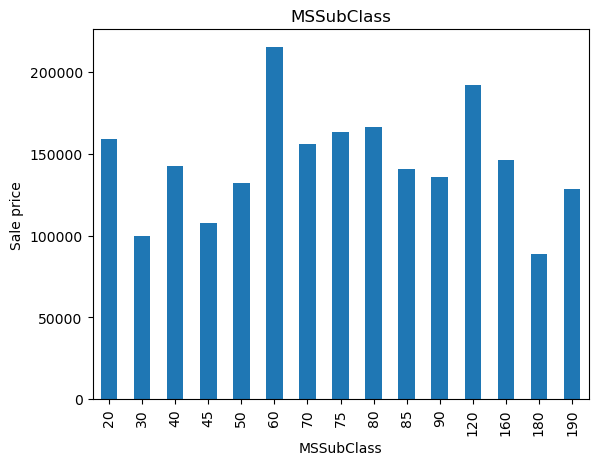

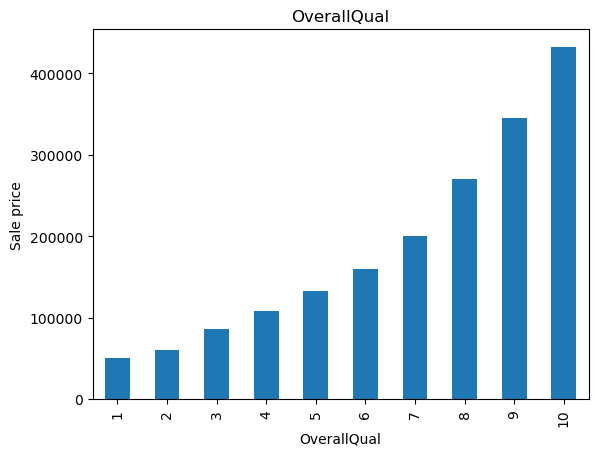

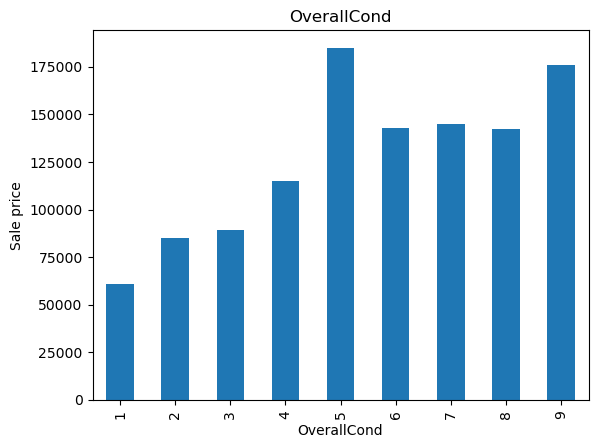

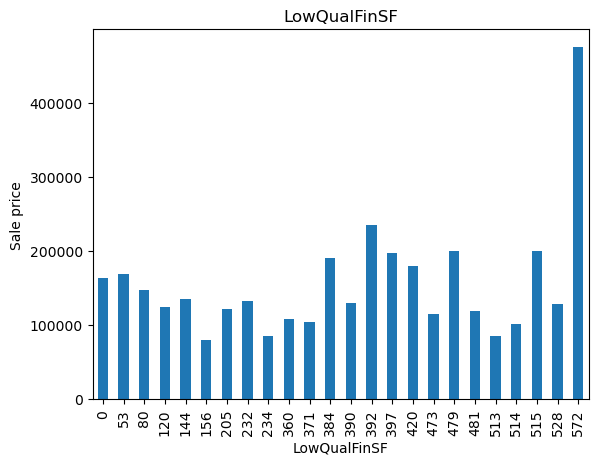

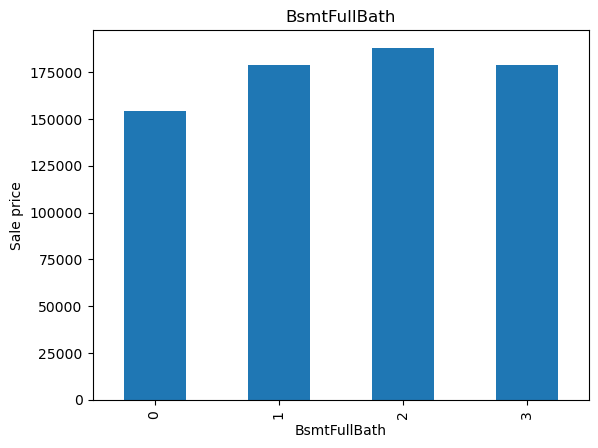

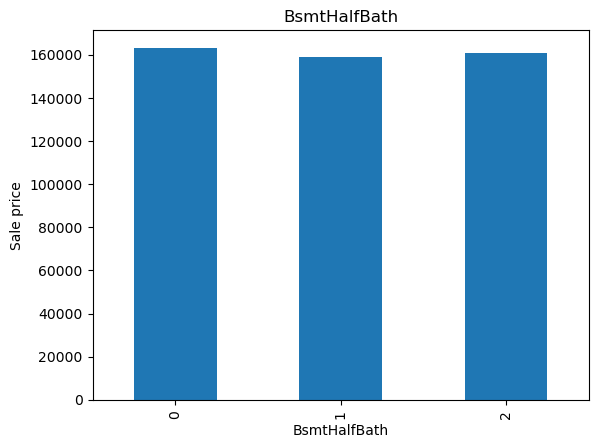

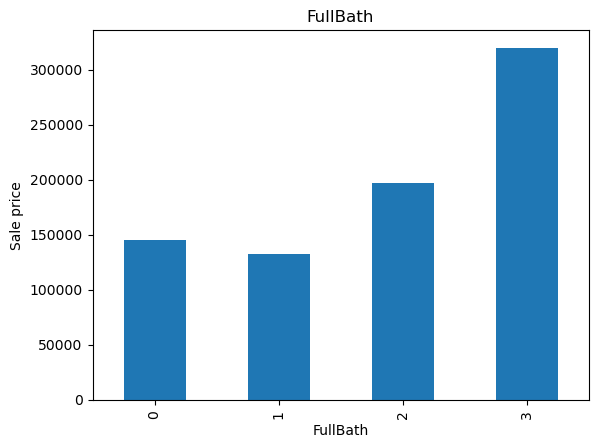

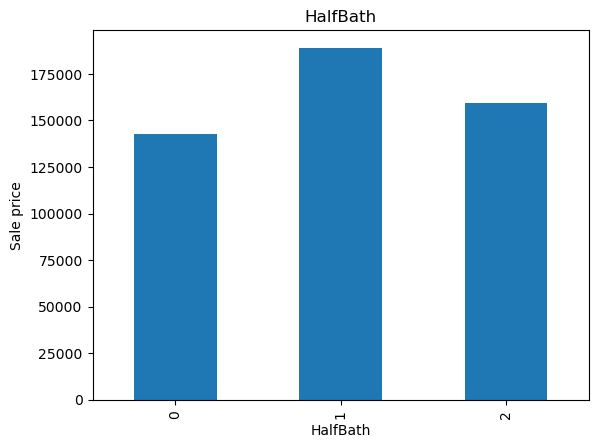

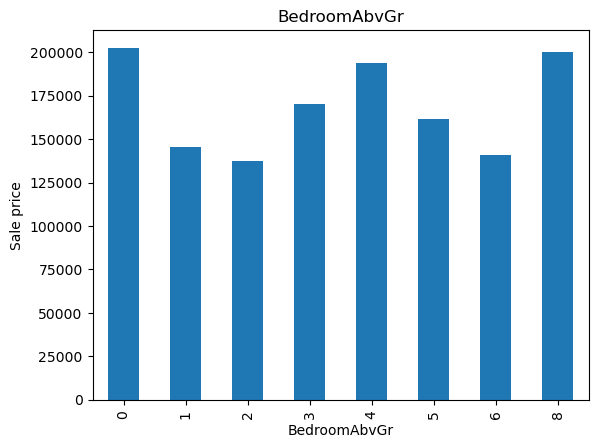

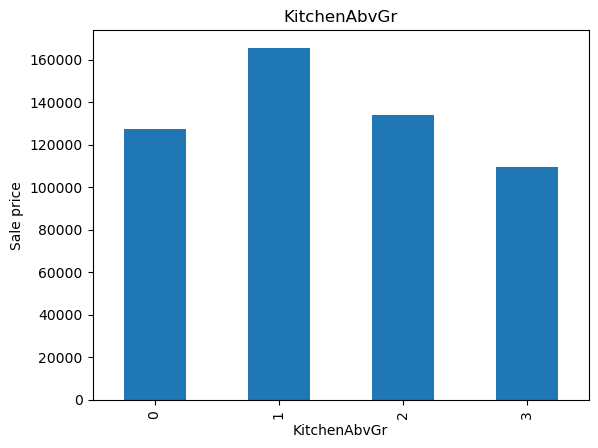

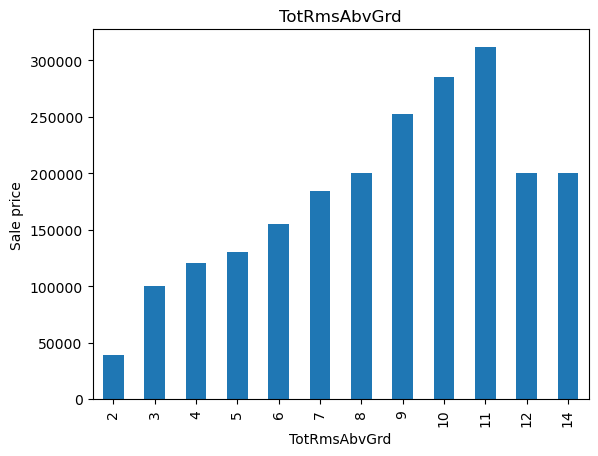

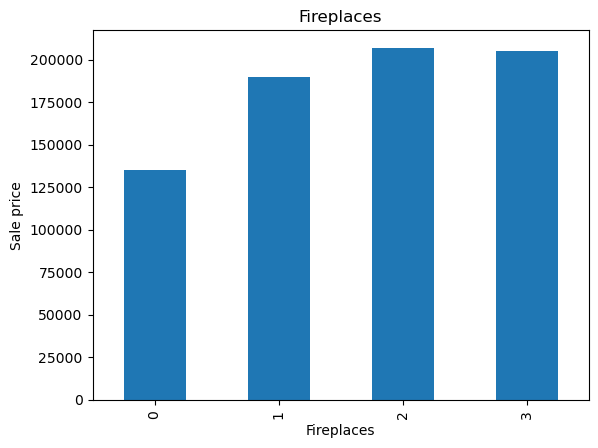

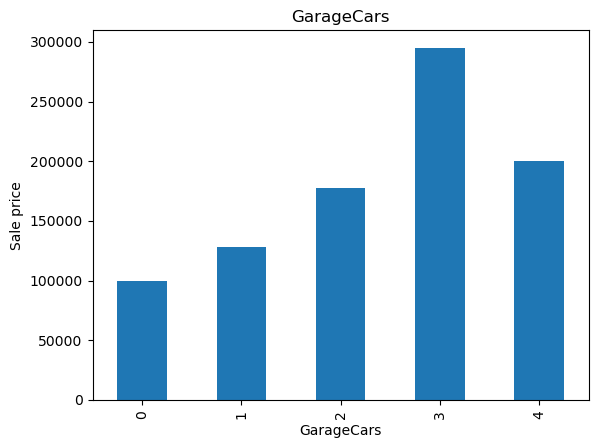

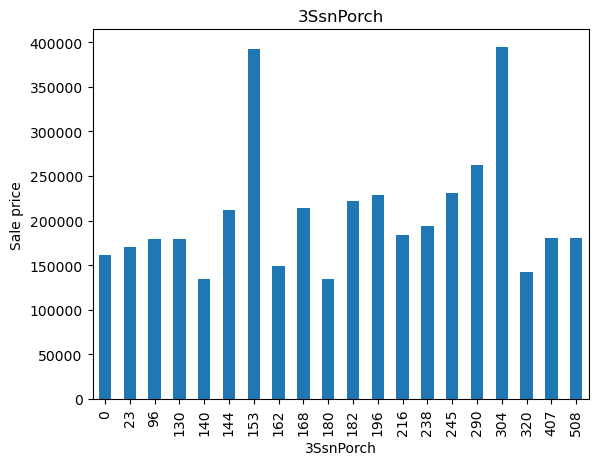

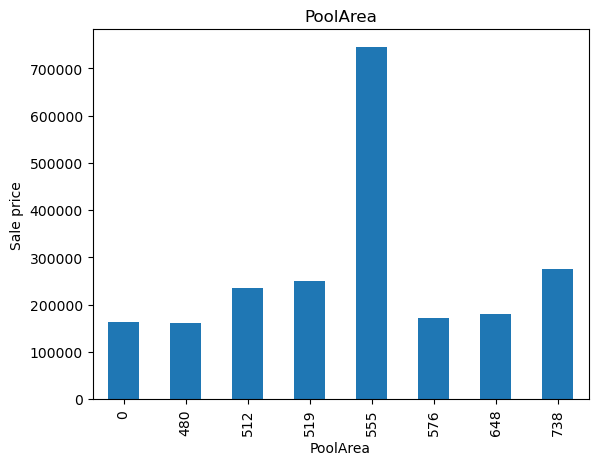

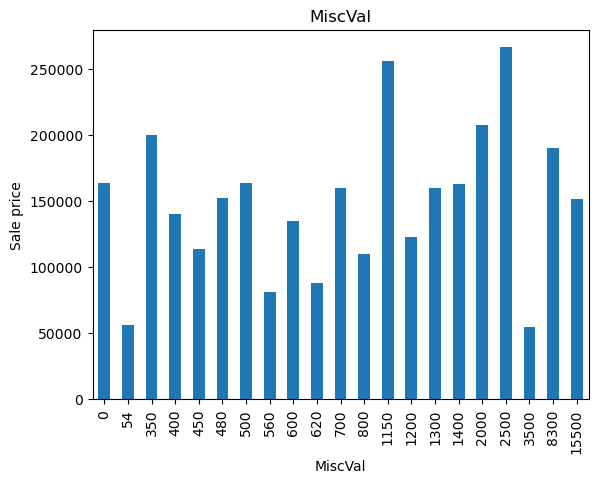

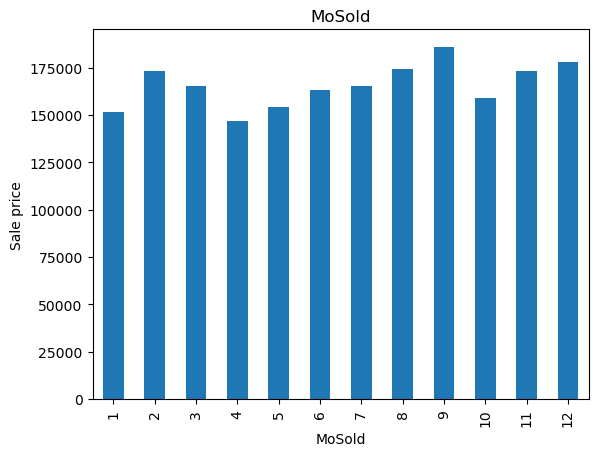

In [15]:
# Now lets find the relation ship for price with discrete features

for feature in discrete_feature:
    
    data= dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale price')
    plt.title(feature)
    plt.show()

In [16]:
# above graph shows the relationship between the price and the features


### Now continous variable

In [17]:
continous_feature = [features for features in numerical_features if features not in discrete_feature + year_feature + ['Id']]
len(continous_feature)

16

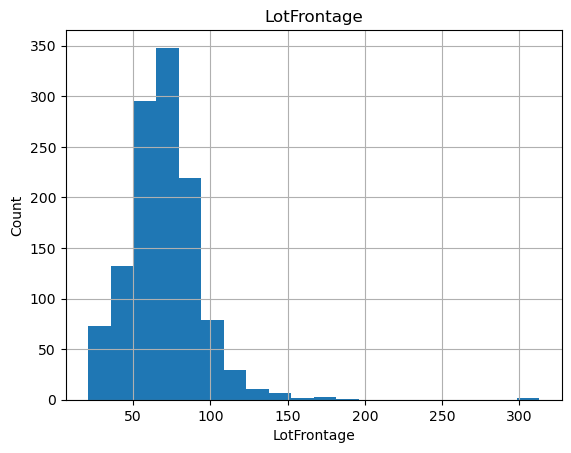

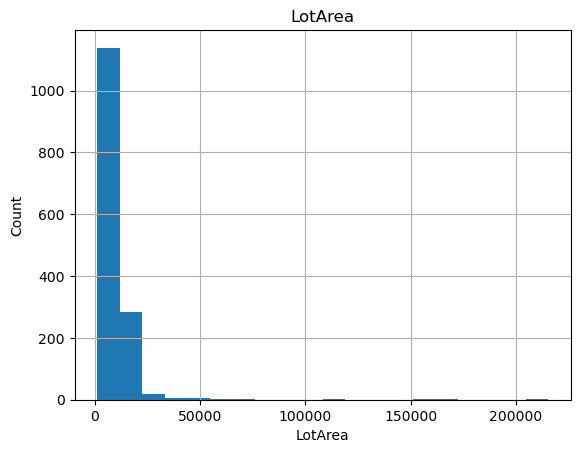

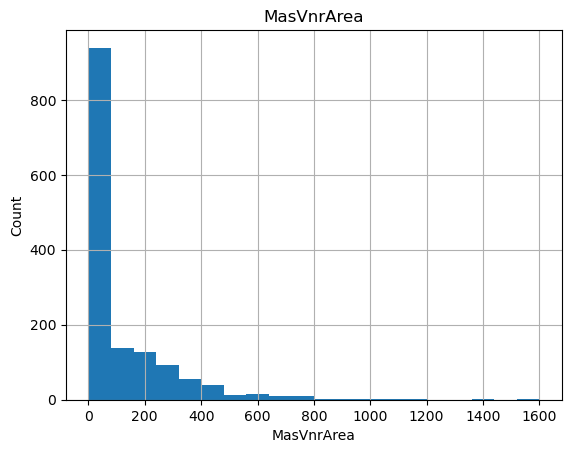

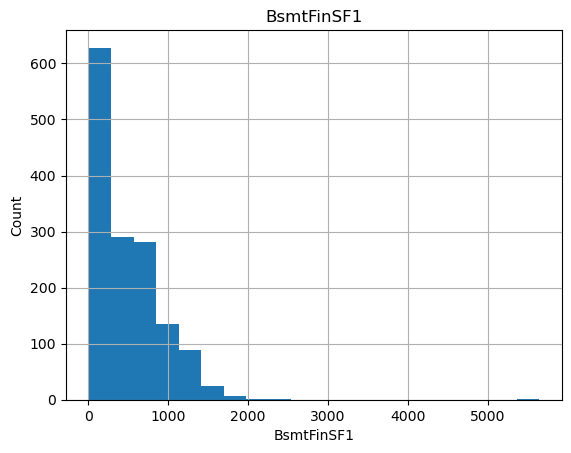

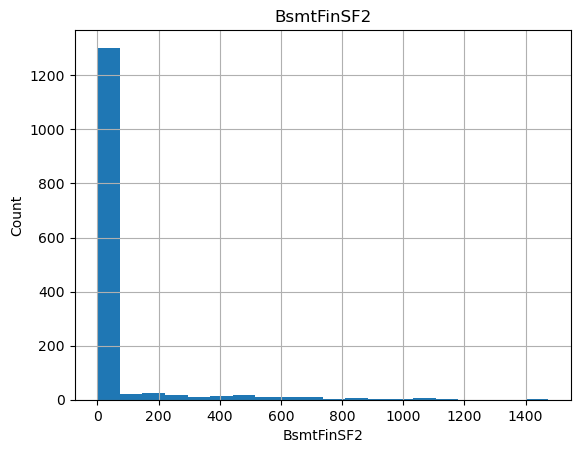

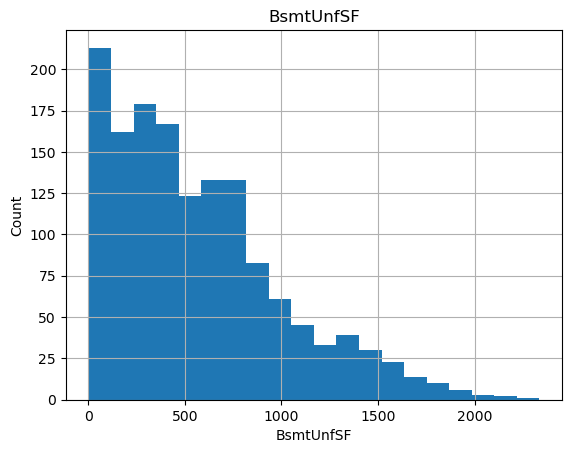

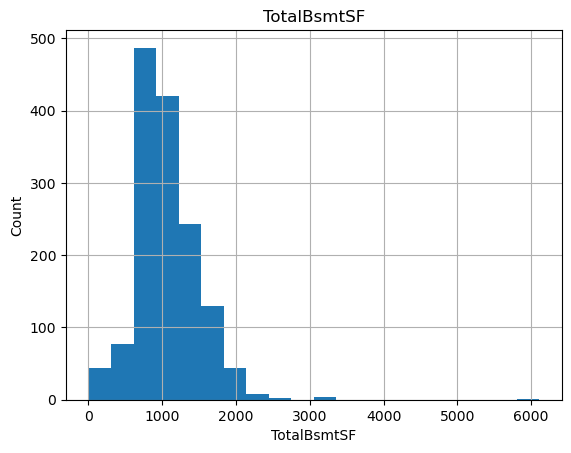

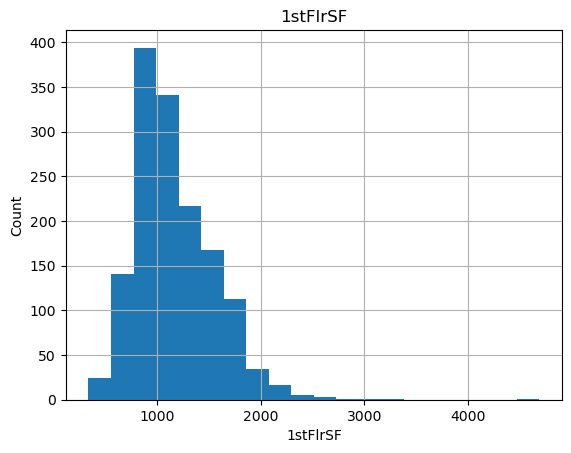

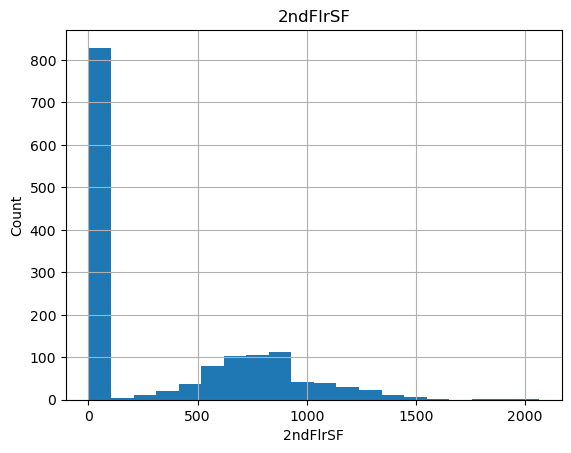

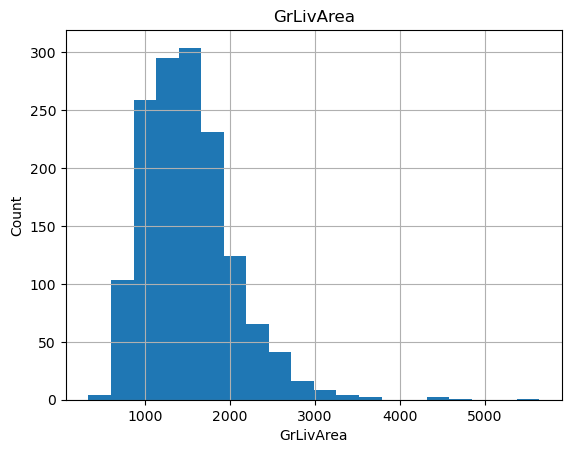

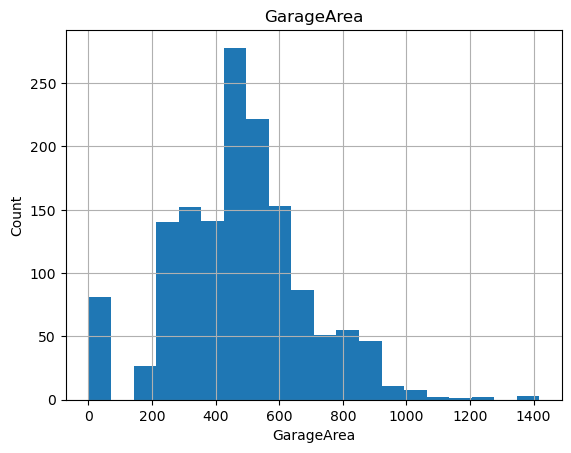

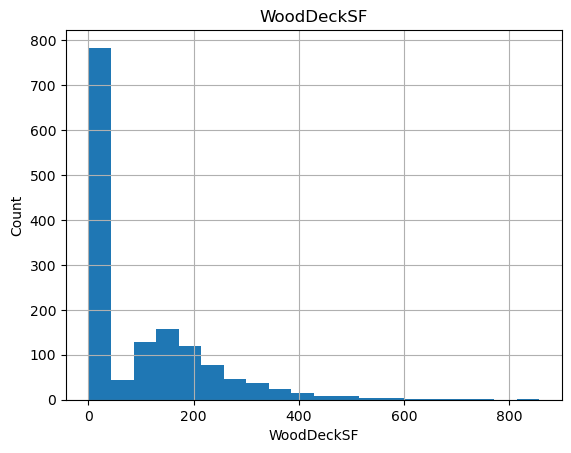

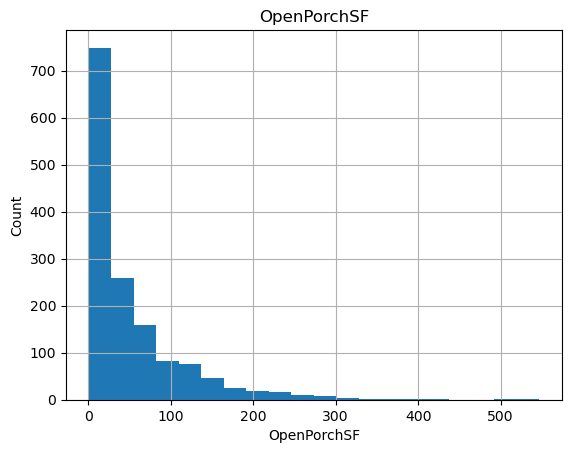

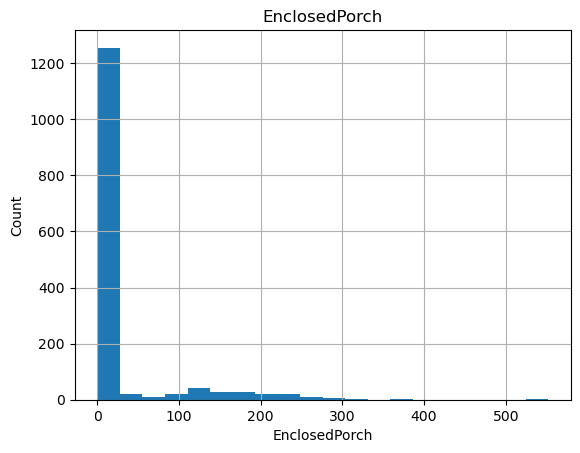

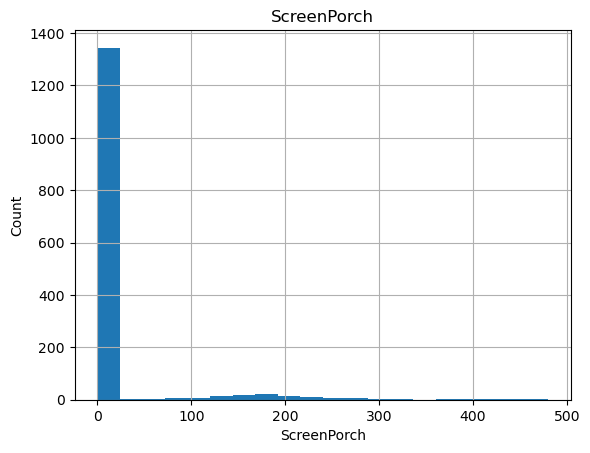

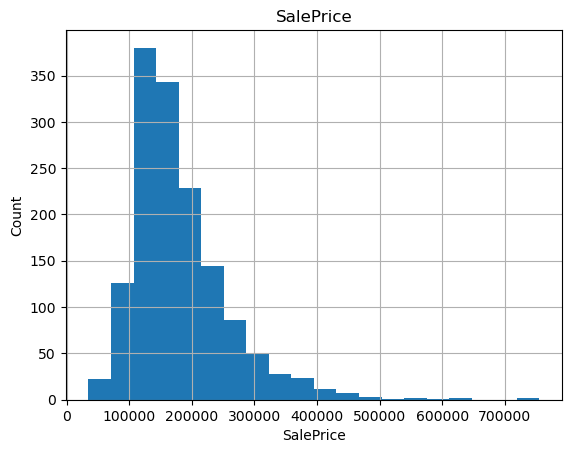

In [18]:
# Reason we are using a histoogram because we are plotting it for continous values
for feature in continous_feature:
    
    data = dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### When performing regression problem or any other prediction problem use normalization for bringing data under specific range( We can see diff/data distributed under continous variable)

### PART 2 FOR EDA

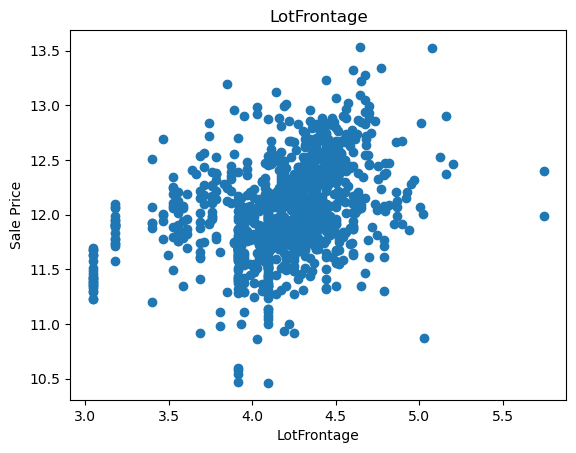

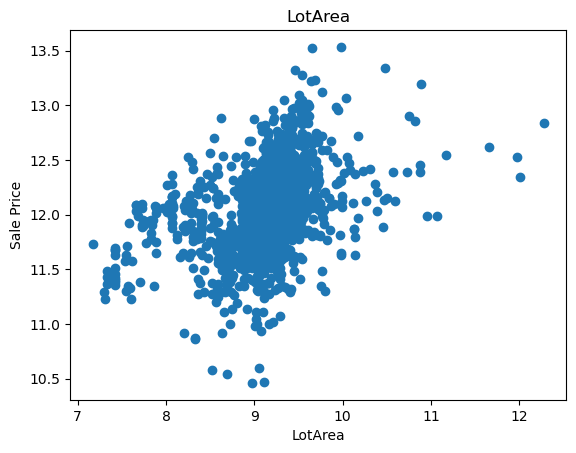

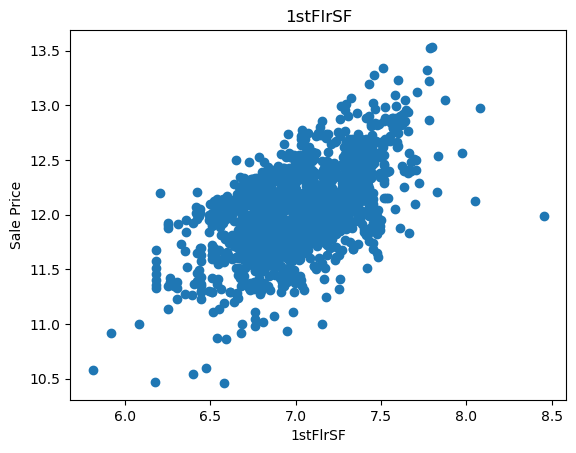

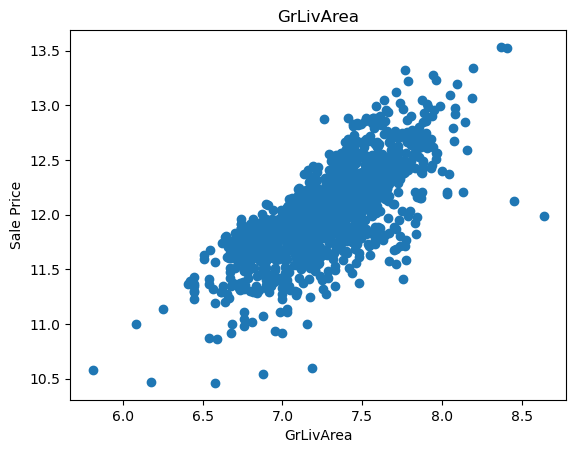

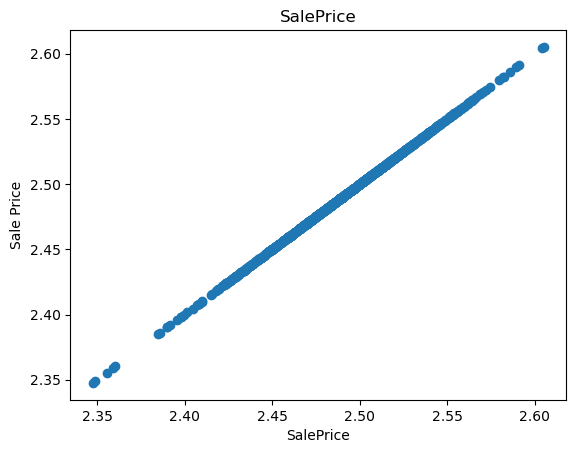

In [19]:
# now we will do logarithmic transformation on our continous data features

for feature in continous_feature:
    data=dataset.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]= np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.title(feature)
        plt.show()

In [20]:
# So the above scatter plots shows the realtion ship between the 
# continous variables and the sale price that how they are interralted to each other
# one increases with the another

## OUTLIERS

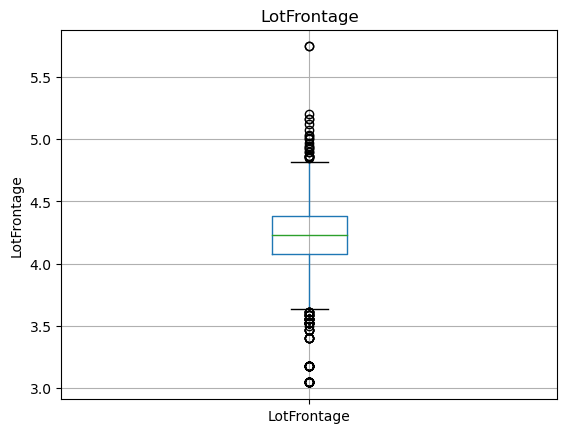

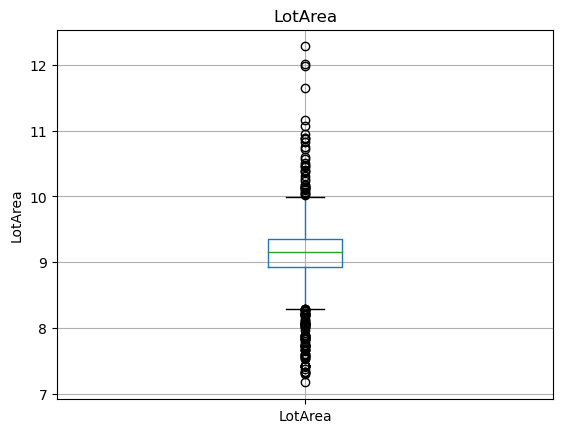

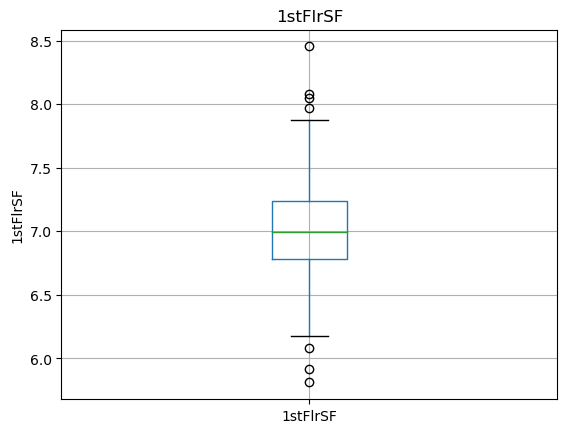

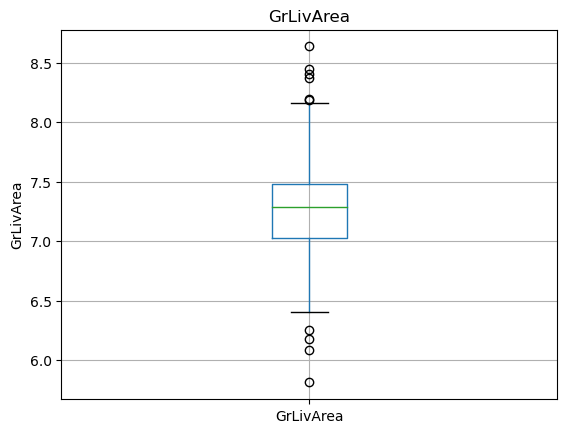

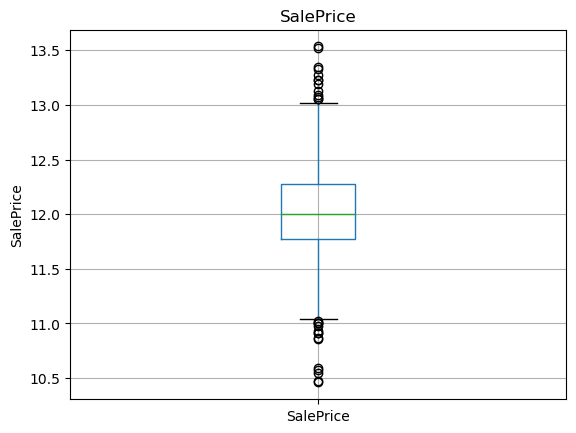

In [21]:
# Now we will take a look on tho the outliers in our continous features
for feature in continous_feature:
    data = dataset.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]= np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [22]:
#from the above box plot we can see the outliers and we can remove them as they are of no use

## CATEGORICAL FEATURES

In [23]:
categorical_features = [feature for feature in dataset.columns if data[feature].dtype == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [24]:
# now checking the categories in each feature
for feature in categorical_features:
    print(f"The feature is {feature} with the categories {len(dataset[feature].unique())}")
# This shows how many catergories are thier in each features

The feature is MSZoning with the categories 5
The feature is Street with the categories 2
The feature is Alley with the categories 3
The feature is LotShape with the categories 4
The feature is LandContour with the categories 4
The feature is Utilities with the categories 2
The feature is LotConfig with the categories 5
The feature is LandSlope with the categories 3
The feature is Neighborhood with the categories 25
The feature is Condition1 with the categories 9
The feature is Condition2 with the categories 8
The feature is BldgType with the categories 5
The feature is HouseStyle with the categories 8
The feature is RoofStyle with the categories 6
The feature is RoofMatl with the categories 8
The feature is Exterior1st with the categories 15
The feature is Exterior2nd with the categories 16
The feature is MasVnrType with the categories 4
The feature is ExterQual with the categories 4
The feature is ExterCond with the categories 5
The feature is Foundation with the categories 6
The fea

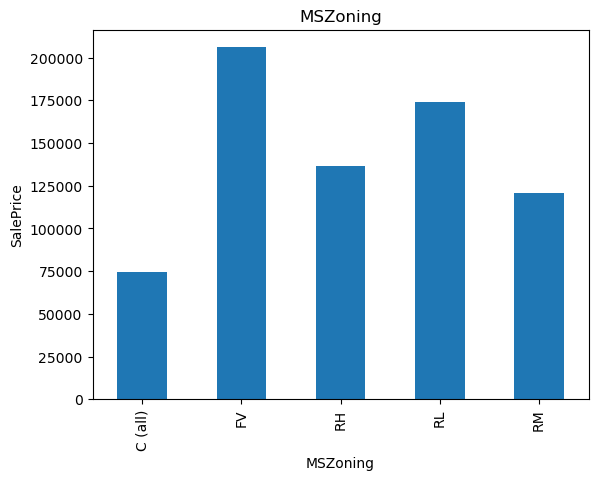

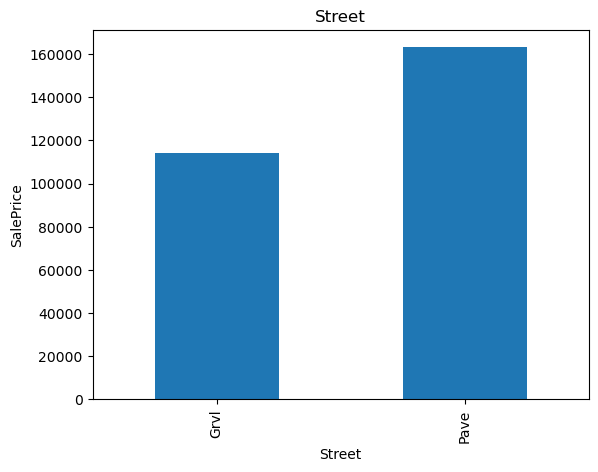

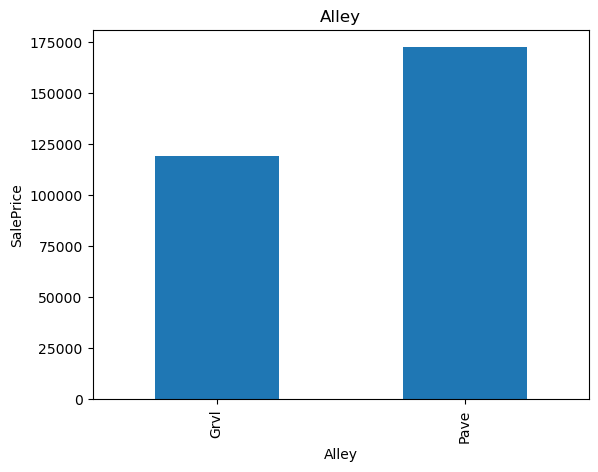

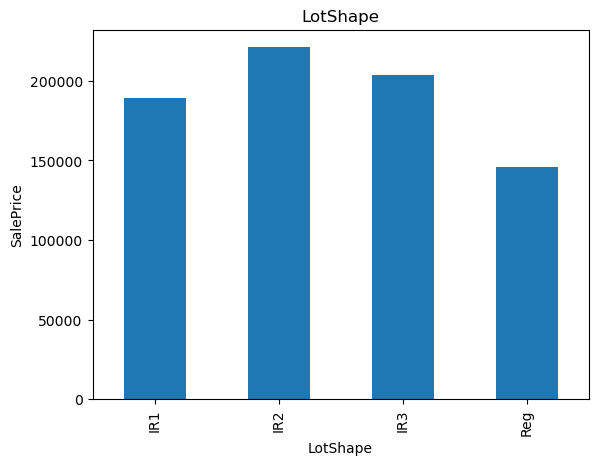

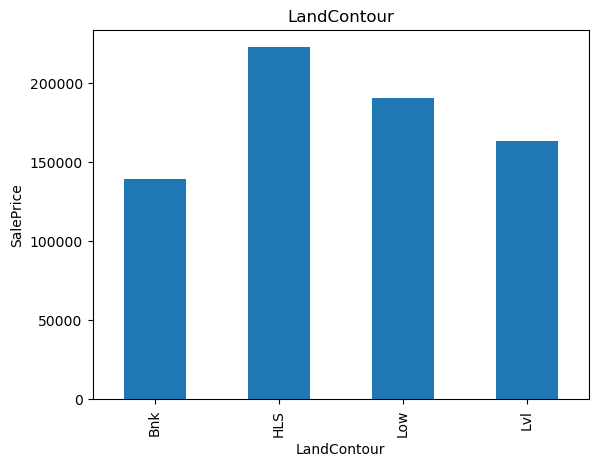

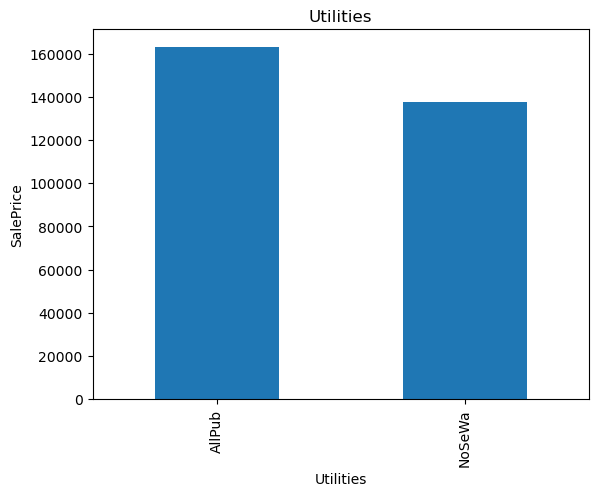

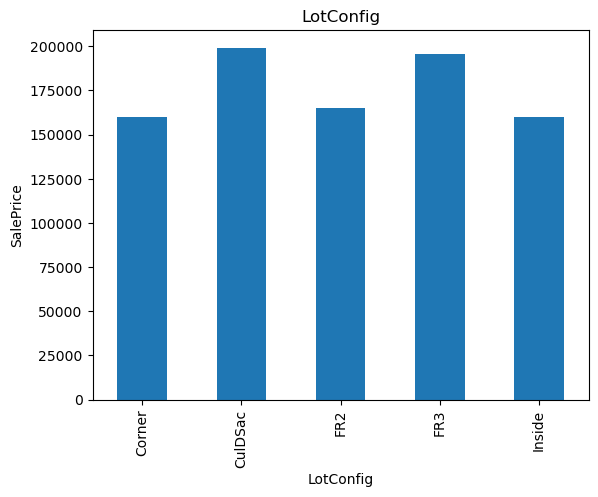

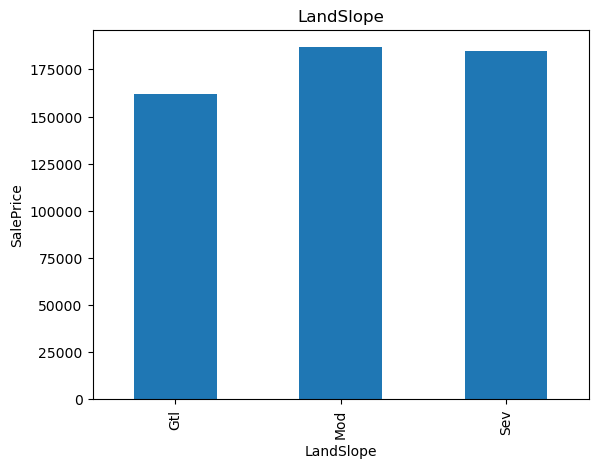

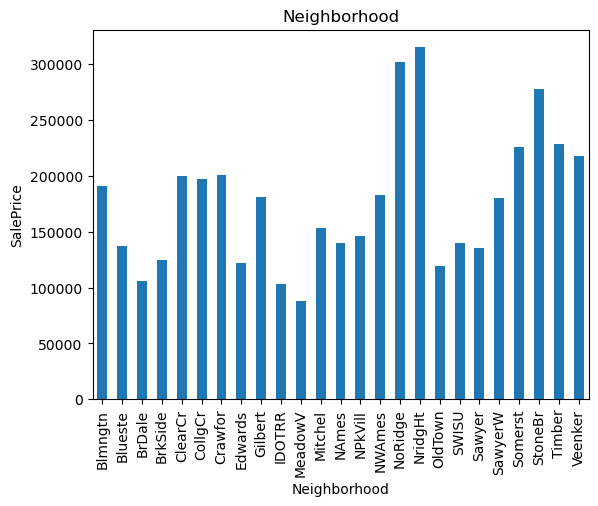

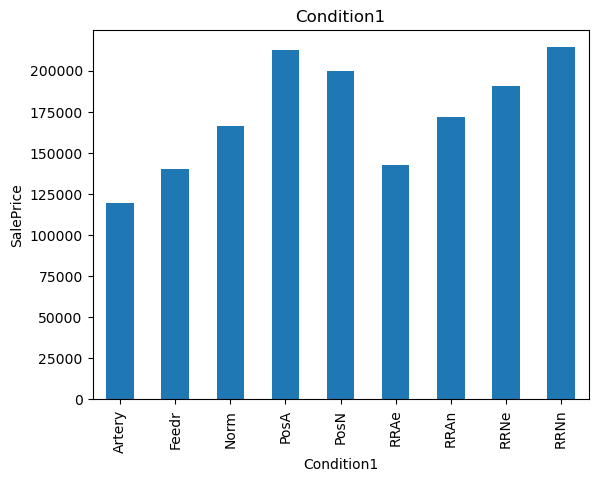

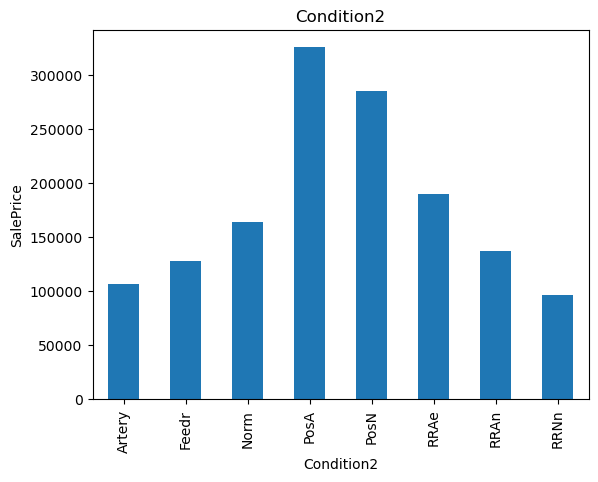

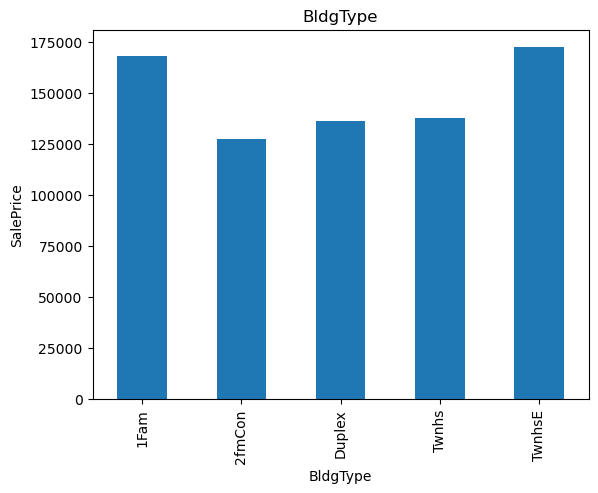

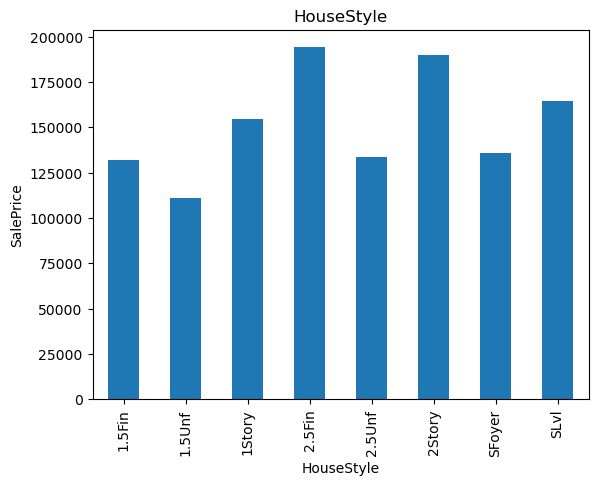

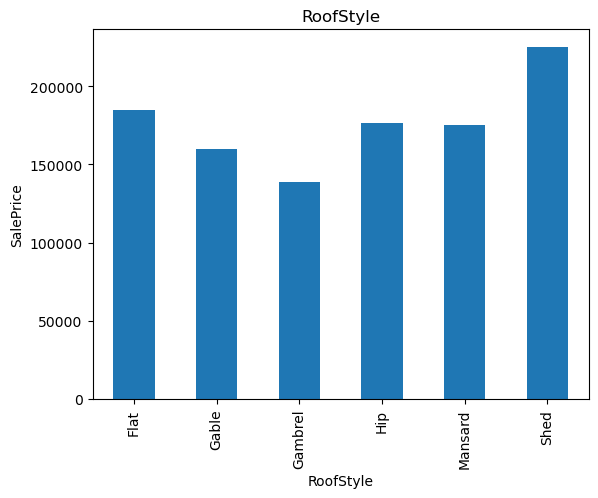

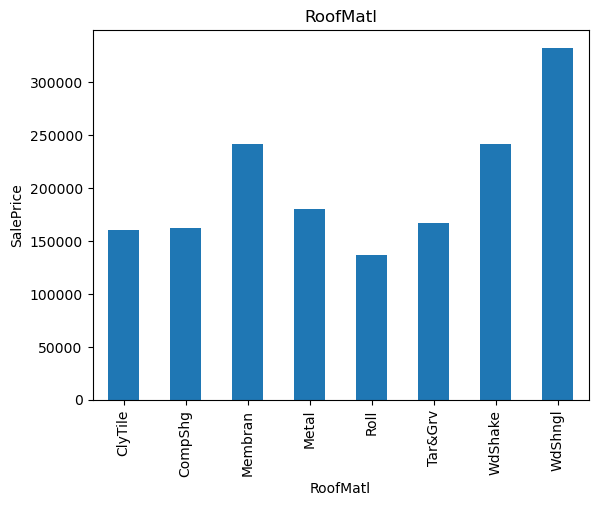

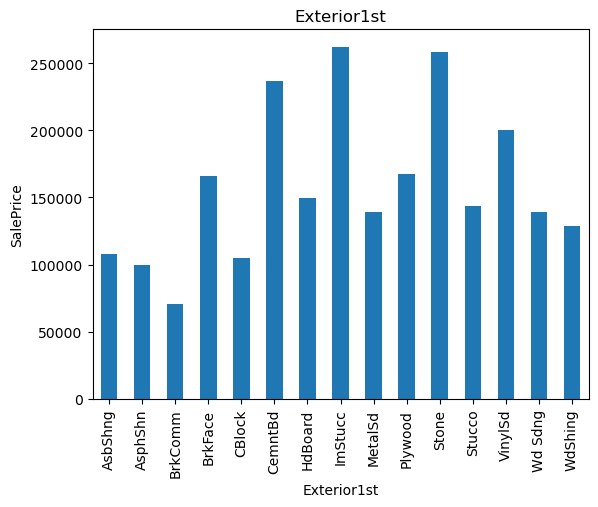

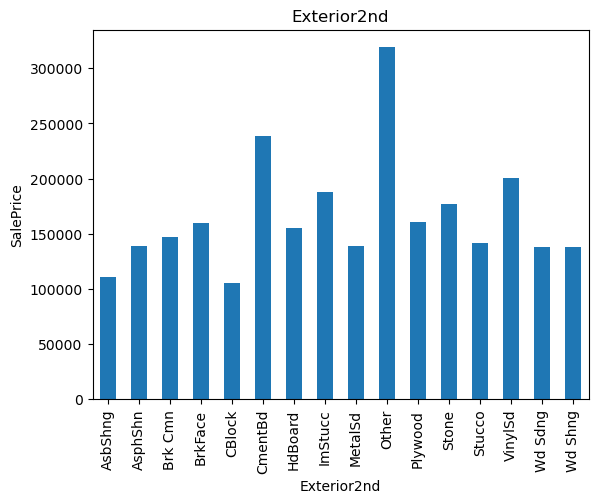

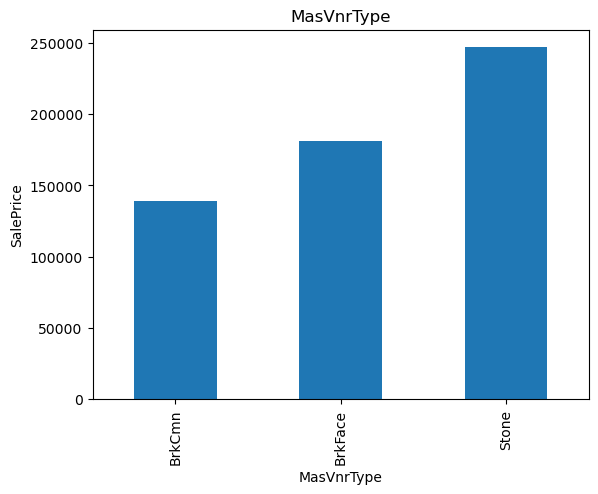

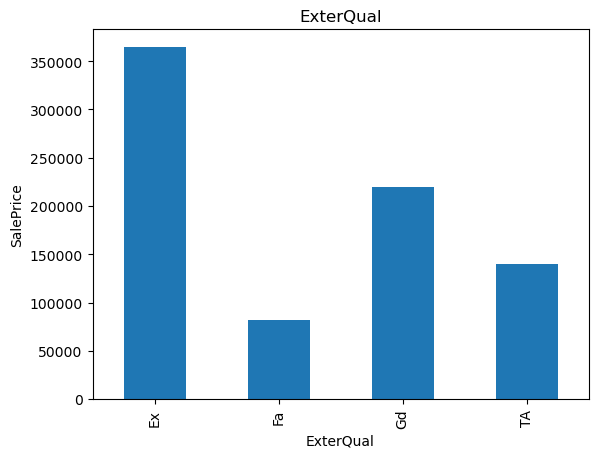

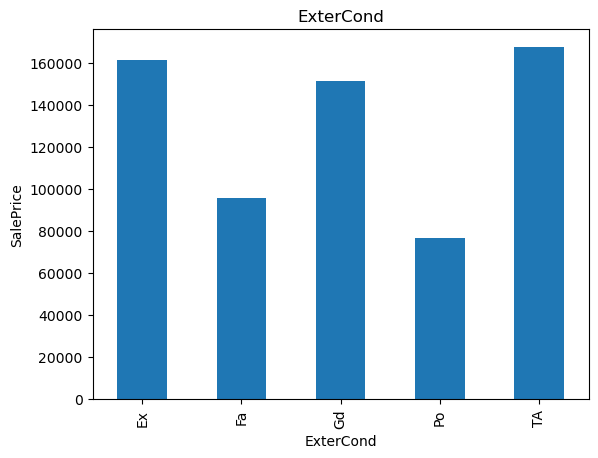

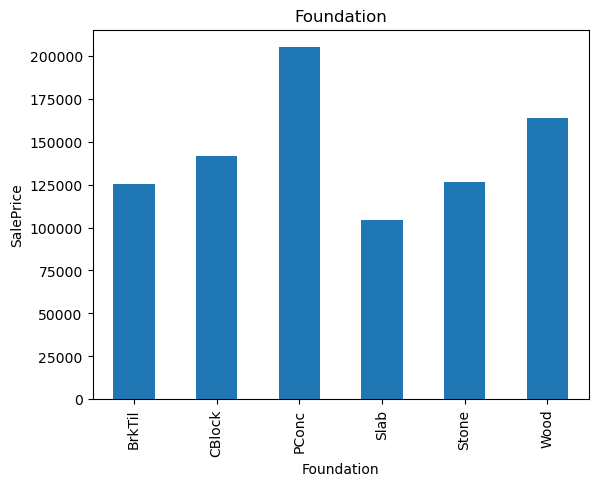

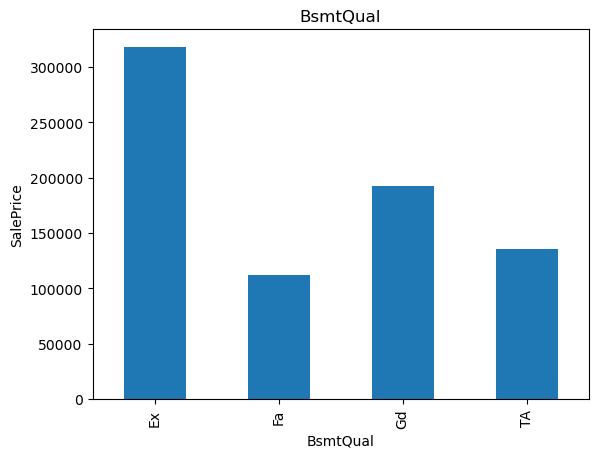

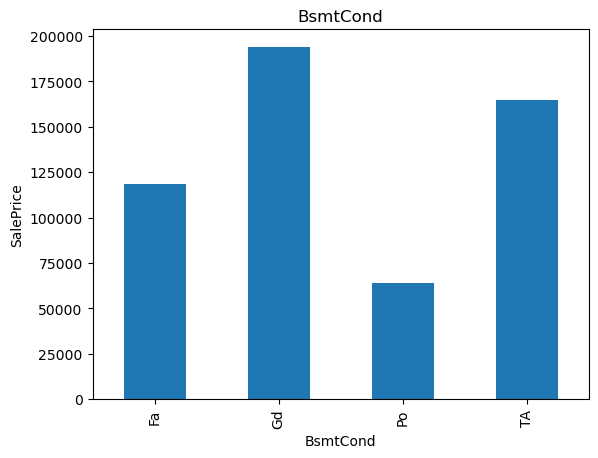

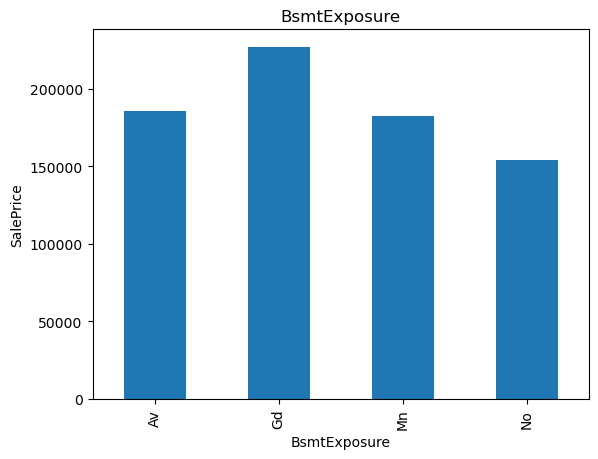

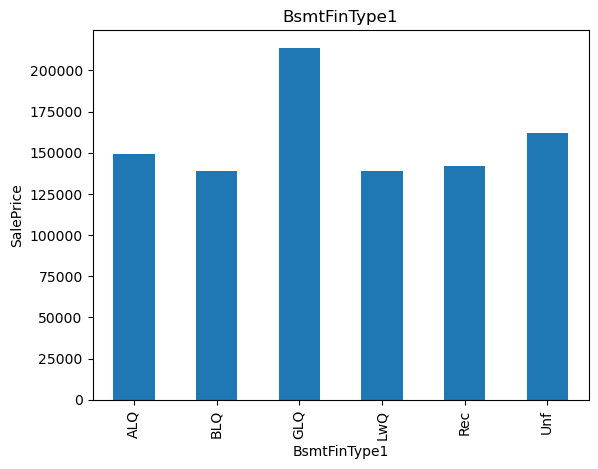

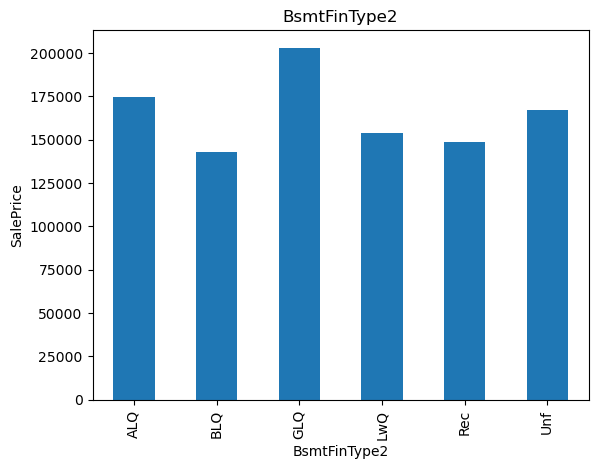

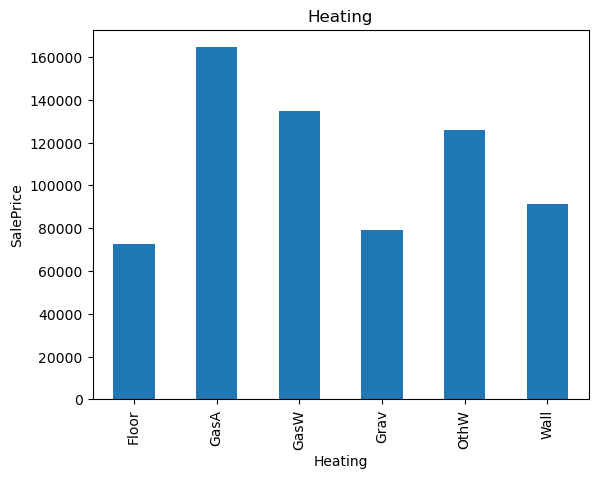

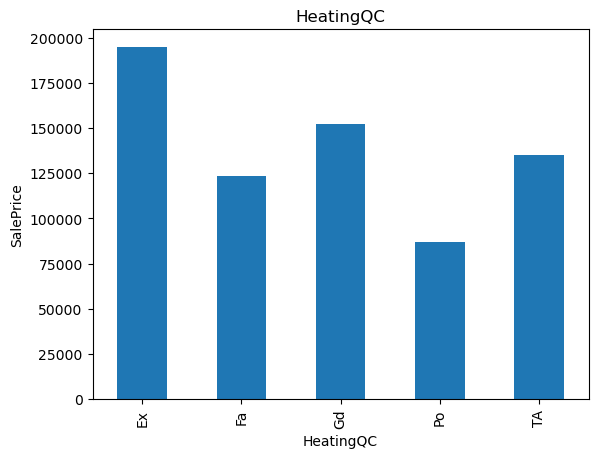

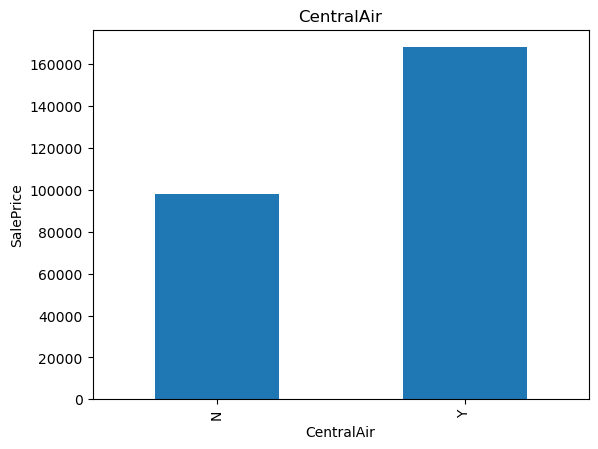

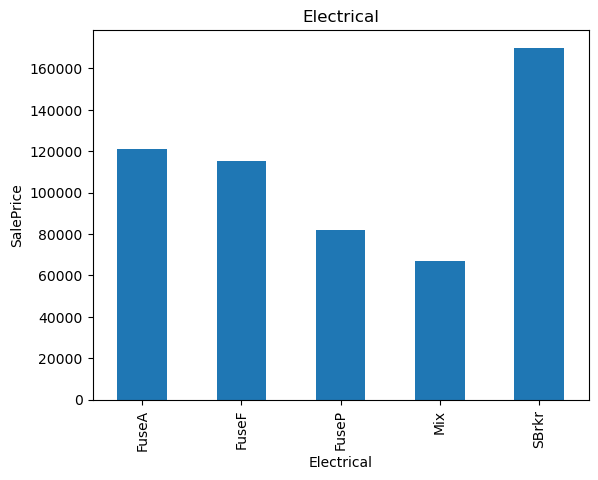

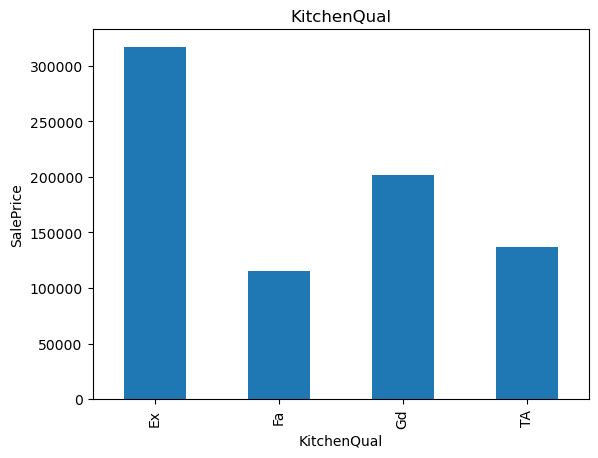

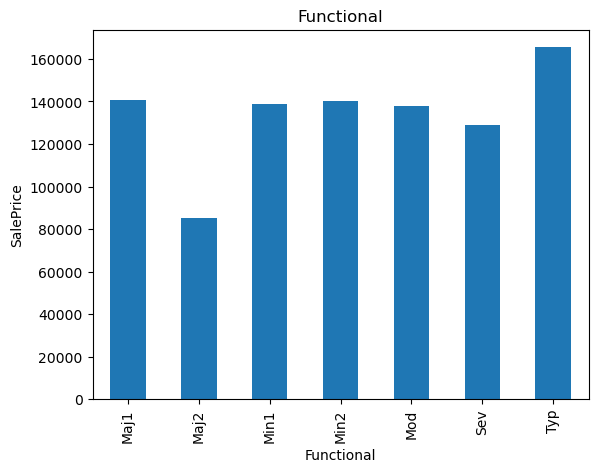

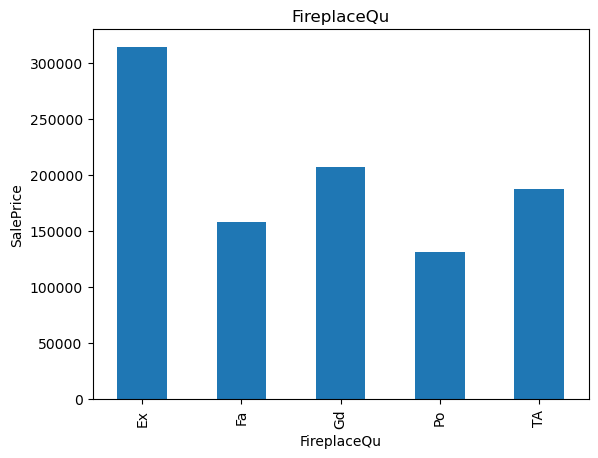

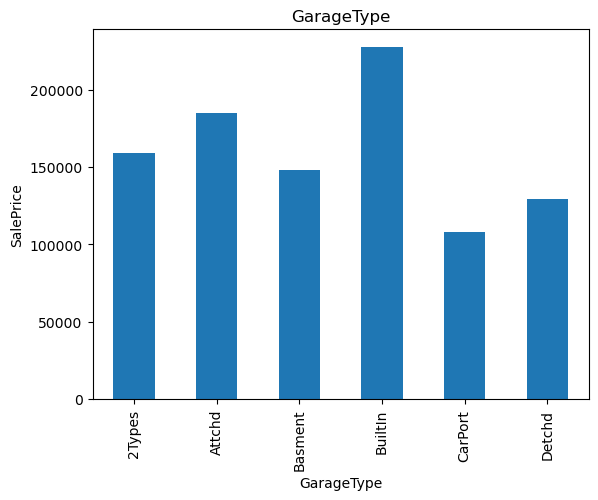

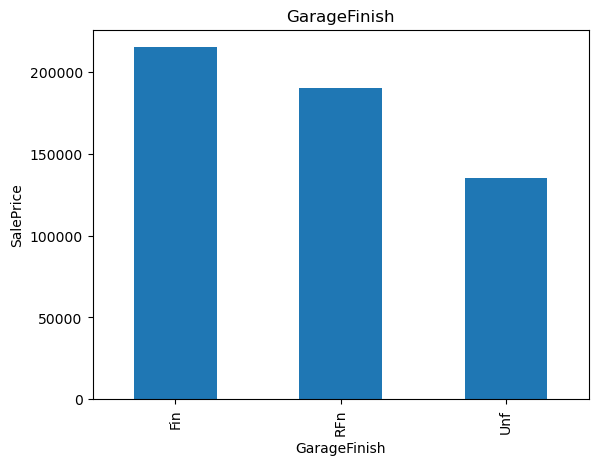

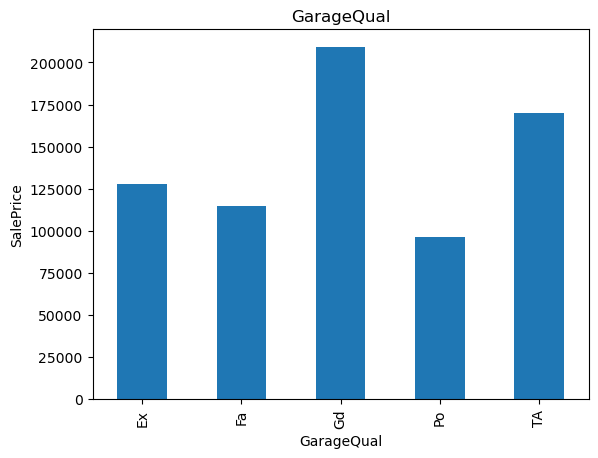

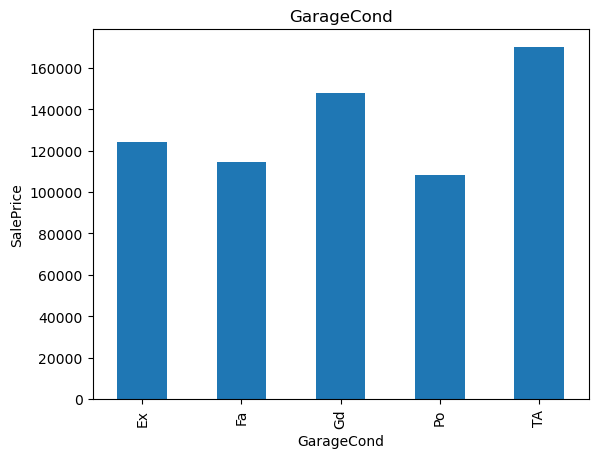

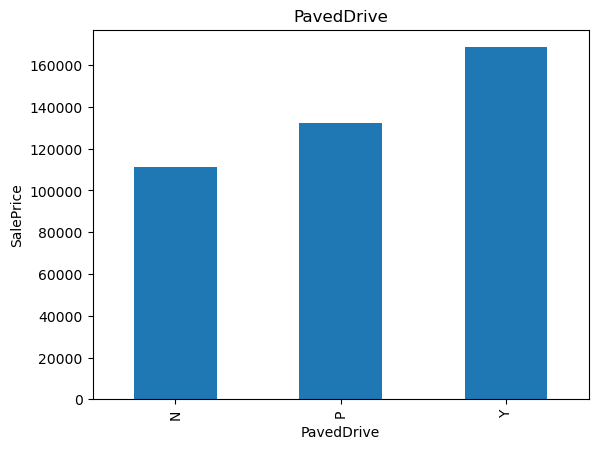

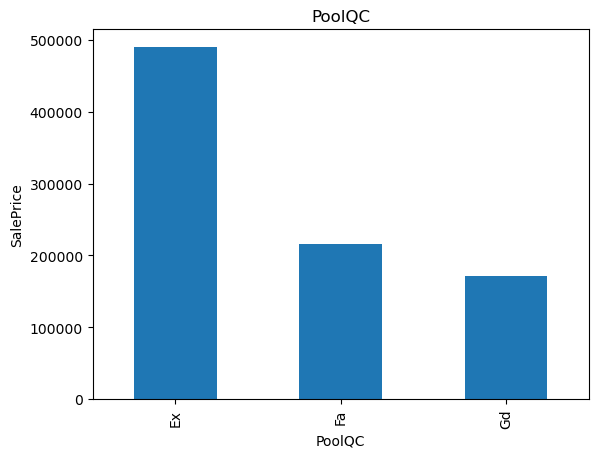

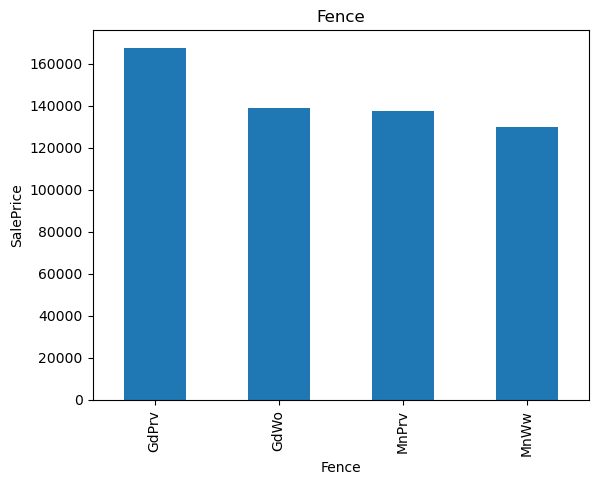

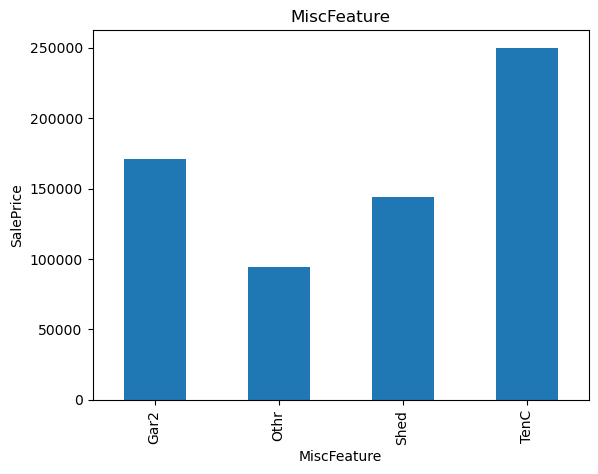

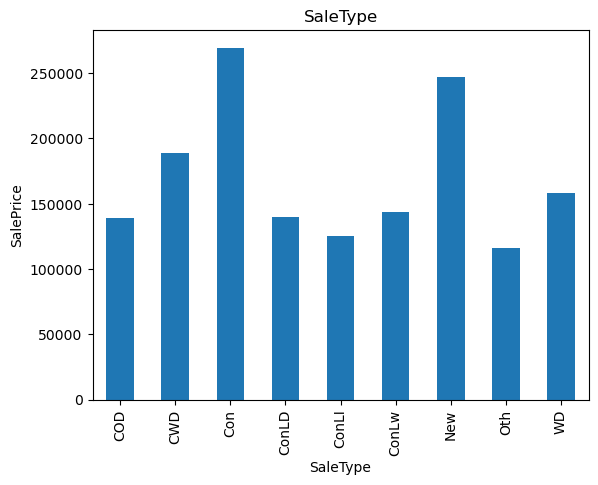

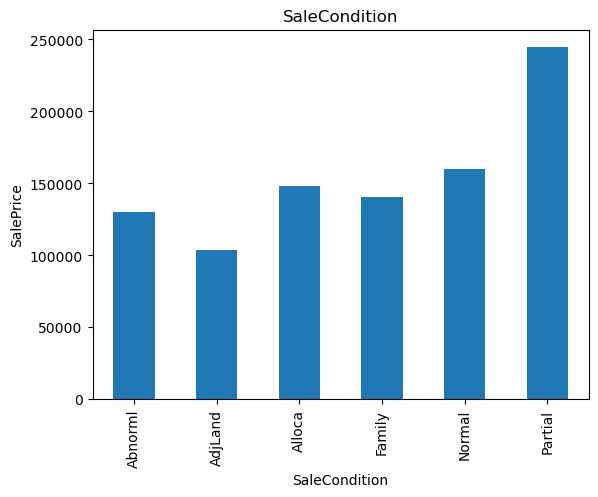

In [25]:
# Now lets check the relation ship between the categoric features and sale price
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    
# The reason why iam using meadian is because there are outliers in our data set so its better to use median